In [2]:
import numpy as np
import random
# from neural import *
import matplotlib.pyplot as plt

In [3]:
class NN:
    def __init__(self, shape, dna=None):
        self.shape = shape
        self.w = []
        if dna is None:
            self.gen_weights()
        else:
            self.dna(dna)

    def gen_weights(self, random=True):
        self.w = []
        for i in range(len(self.shape) -1):
            w = np.zeros((self.shape[i+1] + 1, self.shape[i] + 1))
            if random:
                w[:-1] = np.random.random((self.shape[i+1], self.shape[i]+1)) * 2 -1
            w[-1, -1] = 1
            
            self.w.append(w)

    def process(self, data):
        try:
            l = len(data)
        except TypeError:
            # dado nao eh uma lista
            l = 1
            data = [data]
        finally:
            if l != self.shape[0]:
                raise TypeError('entrada com tamanho diferente to esperado')

        z = np.concatenate((data, [np.ones_like(data[0])]))
#         z = np.zeros(self.shape[0] + 1)
#         z[:self.shape[0]] = data
#         z[-1] = 1
        print(z)
        for w in self.w[:-1]:
            z = self.foward(w, z, func=self.relu)
            print(z)
        z = self.foward(self.w[-1], z, func=None)
        
        return z[:-1]
                                 
    def foward(self, w, z, func=None):
        z = np.dot(w, z)
        if func is not None:
            z[:-1] = func(z[:-1])
        return z
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def relu(self, z):
        z[z<0] = 0
        return z
    
    def softplus(self, z):
        return np.log(1 + np.exp(z))
    
    def softmax(self, z):
        return z/self.sum(z)
    
    def sum(self, z):
        return np.sum(z, axis=0)
    
    def dna(self, dna=None):
        if dna is None:
            # retorna os parametros como uma lista
            return np.concatenate([w[:-1].reshape(-1) for w in self.w])
        else:
            # atribui os parametros a partir de um lista
            dna = np.array(dna)
            self.gen_weights(random=False)
            i = 0
            for j in range(len(self.shape) -1):
                new_i = i + (self.shape[j]+1)*self.shape[j+1]
                self.w[j][:-1] = dna[i:new_i].reshape(self.shape[j+1], -1)
                i = new_i


In [20]:
data = [[1,2,3], [1,2,3]]
print(np.ones_like(data[0]))
# np.append(data, np.ones_like(data[0]), axis=1)
np.concatenate((data, [np.ones_like(data[0])]))

[1 1 1]


array([[1, 2, 3],
       [1, 2, 3],
       [1, 1, 1]])

In [121]:
nn = NN((1, 2, 1))
x = np.array([[1,2]])
z = np.concatenate((x, [np.ones_like(x[0])]))
nn.process(x)

[[1 2]
 [1 1]]
[[0.2044299  0.        ]
 [1.35810819 1.99122851]
 [1.         1.        ]]


array([[1.18384665, 1.88004086]])

In [123]:
nn.process(2)

[2 1]
[0.         1.99122851 1.        ]


array([1.88004086])

In [4]:
# treinamento regressao 2d
calc_fitness = chi2

x = np.linspace(-2, 2, 15) + np.random.randn(15) * 0.05
y = np.exp(-x**2) + np.random.randn(15) * 0.05
xx = np.linspace(-2, 2, 100)

populacao = 300

pop = Pop(NN, populacao, shape=(1, 3, 1))
calc_fitness(x, y, pop)
fitness = max(pop.fitness)

print("populacao:", populacao)
print('gen\tmelhor fitness')
print("{}\t{}".format(pop.gen, round(fitness, 2)))

while pop.gen < 40:
    pop.next_gen()
    calc_fitness(x, y, pop)
    fitness = max(pop.fitness)
    if pop.gen % 2 == 0:
        print("{}\t{}".format(pop.gen, round(fitness, 2)))
        
# mostra resultado
x = np.linspace(-2, 2, 15) + np.random.randn(15) * 0.05
y = np.exp(-x**2) + np.random.randn(15) * 0.05

# nn = NN((1, 4, 4, 1))
i = np.argmax(pop.fitness)
# i = np.random.randint(0, len(pop.pop))
nn = pop.pop[i]

xx = np.linspace(-2, 2, 100)
plt.scatter(x, y)
yy = [nn.process([x])[0] for x in xx]
plt.plot(xx, yy)
plt.show()

NameError: name 'chi2' is not defined

6.0


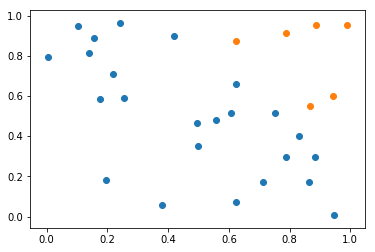

In [251]:
# treinamento classificacao

p = np.random.random((3, 30))
p[2] = (p[0]**2 + p[1]**2) > 1


print(np.sum(p[2]))

plt.scatter(p[0, p[2]==0], p[1, p[2]==0])
plt.scatter(p[0, p[2]==1], p[1, p[2]==1])
plt.show()

6.0


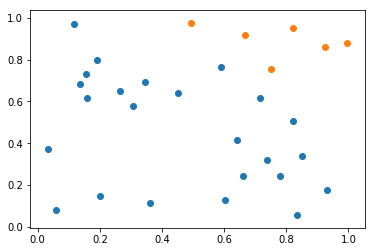

In [237]:
p[2] == 0

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [150]:
pop = Pop(NN, 5, shape=(1,2,1))
def chimean(x, y, pop):
    fit = []
    for c in pop.pop:
        yy = yy = [c.process([i])[0] for i in x]
        s = np.sum((yy - y)**2)
        ym = np.mean(yy)
        sm = np.sum((yy - ym)**2)
        print(s, sm)
        fit.append(1 - s/sm)
    pop.fitness = fit
chimean(x, y, pop)

10.23055957218326 2.261769292999135
10.333193511719383 2.191641468964742
3.739720728735781 0.8166517983192214
10.7304511900466 0.8758043394931778
47.61757705229601 1.1888659603885112
